In [1]:
pwd

'/content'

In [55]:
import torch.nn as nn

# convolutional layer 1
conv_layer1 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(5,5)),
    nn.ReLU(),
)

# convolutional layer 2
conv_layer2 = nn.Sequential(
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3)),
    nn.ReLU(),
)

# convolutional layer 23
conv_layer3 = nn.Sequential(
    nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(1,1)),
    nn.ReLU(),
)


# fully connected layer 1
fc_layer1 = nn.Sequential(
    nn.Linear(in_features=16*5*5, out_features=64),
    nn.ReLU(),
)

# fully connected layer 2
fc_layer2 = nn.Linear(in_features=64, out_features=10)



LeNet5 = nn.Sequential(
    conv_layer1,
    nn.MaxPool2d(kernel_size=(2,2)),
    conv_layer2,
    nn.MaxPool2d(kernel_size=(2,2)),
    conv_layer3,
    nn.Flatten(), # flatten
    fc_layer1,
    fc_layer2

)


In [21]:
import time

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms

from torch.utils.data import DataLoader
from dataset import load_mnist, load_cifar10, load_fashion_mnist, imshow
#from model import LeNet5

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

trainset, testset = load_mnist()



[epoch  1, batch  1000] loss: 0.685
The current learning rate is: 0.010000 
[epoch  1, batch  2000] loss: 0.168
The current learning rate is: 0.010000 
[epoch  1, batch  3000] loss: 0.131
The current learning rate is: 0.010000 
[epoch  1, batch  4000] loss: 0.104
The current learning rate is: 0.010000 
[epoch  1, batch  5000] loss: 0.101
The current learning rate is: 0.010000 
[epoch  1, batch  6000] loss: 0.096
The current learning rate is: 0.010000 
[epoch  1, batch  7000] loss: 0.083
The current learning rate is: 0.010000 
[epoch  2, batch  1000] loss: 0.054
The current learning rate is: 0.001000 
[epoch  2, batch  2000] loss: 0.036
The current learning rate is: 0.001000 
[epoch  2, batch  3000] loss: 0.040
The current learning rate is: 0.001000 
[epoch  2, batch  4000] loss: 0.032
The current learning rate is: 0.001000 
[epoch  2, batch  5000] loss: 0.032
The current learning rate is: 0.001000 
[epoch  2, batch  6000] loss: 0.038
The current learning rate is: 0.001000 
[epoch  2, b

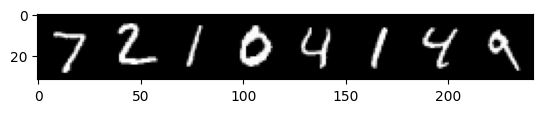

Accuracy on the train set: 99.145000 %
Accuracy on the test set: 99.040000 %


In [56]:
trainloader = DataLoader(trainset, batch_size=8, shuffle=True)
testloader = DataLoader(testset, batch_size=8, shuffle=False)
model = LeNet5.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.Adagrad(model.parameters(), lr=0.01)
#optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.RMSprop(model.parameters(), lr=0.001, momentum=0.9)

scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[1,2],gamma=0.1)

# loop over the dataset multiple times

start_time = time.time()
num_epoch = 3
model.train()
for epoch in range(num_epoch):
    running_loss = 0.0
    for i, batch in enumerate(trainloader, 0):
        # get the images; batch is a list of [images, labels]
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()  # zero the parameter gradients

        # get prediction
        outputs = model(images)
        # compute loss
        loss = loss_fn(outputs, labels)
        # reduce loss
        loss.backward()
        optimizer.step()


        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:  # print every 500 mini-batches
            print('[epoch %2d, batch %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
            # train_acc =
            # test_acc =
            # print('Accuracy on the train set: %f %%' % (100 * train_acc))
            # print('Accuracy on the test set: %f %%' % (100 * test_acc))
            print('The current learning rate is: %f ' % (scheduler.get_last_lr()[0]))

    scheduler.step()


model_file = 'model.pth'
torch.save(model.state_dict(), model_file)
print(f'Model saved to {model_file}.')

print('Finished Training')
end_time = time.time()  # Record the end time
total_training_time = end_time - start_time

print(f"Total training time: {total_training_time:.2f} seconds")

# show some prediction result
dataiter = iter(testloader)
# images, labels = dataiter.next()
images, labels = next(dataiter)
images = images.to(device)
predictions = model(images).argmax(1).detach().cpu()

classes = trainset.classes
print('GroundTruth: ', ' '.join('%5s' % classes[i] for i in labels))
print('Prediction: ', ' '.join('%5s' % classes[i] for i in predictions))
imshow(torchvision.utils.make_grid(images.cpu()))


# test
@torch.no_grad()
def accuracy(model, data_loader):
    model.eval()
    correct, total = 0, 0
    for batch in data_loader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return correct / total

train_acc = accuracy(model, trainloader)
test_acc = accuracy(model, testloader)

print('Accuracy on the train set: %f %%' % (100 * train_acc))
print('Accuracy on the test set: %f %%' % (100 * test_acc))


7500.0

In [26]:
# prompt: how to use optim.lr_scheduler.MultiStepLR,  change learning rate every 1000 step within a eposh

# ... (Your existing code)

scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[1000, 2000, 3000], gamma=0.1)

# ... (Your existing code)

    for i, batch in enumerate(trainloader, 0):
        # ... (Your existing code)

        if (i + 1) % 1000 == 0:
          print('hey')
          scheduler.step()
          print('The current learning rate is: %f ' % (scheduler.get_last_lr()[0]))

        # ... (Your existing code)

Layer: Sequential, Output Shape: torch.Size([16, 16, 24, 24])
Layer: MaxPool2d, Output Shape: torch.Size([16, 16, 12, 12])
Layer: Sequential, Output Shape: torch.Size([16, 32, 10, 10])
Layer: MaxPool2d, Output Shape: torch.Size([16, 32, 5, 5])
Layer: Sequential, Output Shape: torch.Size([16, 16, 5, 5])
Layer: Flatten, Output Shape: torch.Size([16, 400])
Layer: Sequential, Output Shape: torch.Size([16, 64])
Layer: Linear, Output Shape: torch.Size([16, 10])
